# Juan Carlos Perez Ramirez
## Procesamiento de Lenguaje Natural
## Tarea 2: Minería de Texto Básica

Carga de librerias y definicion de funcion para obtener datos de los archivos

In [1]:
import os
import re
from keras.preprocessing.text import Tokenizer

def get_texts_from_file(path_corpus, path_truth):
    tr_txt = []
    tr_y = []

    with open(path_corpus, "r") as f_corpus, open(path_truth, "r") as f_truth:
        for tweet in f_corpus:
            tr_txt += [tweet]
        for label in f_truth:
            tr_y += [label]
    return tr_txt, tr_y

2025-02-23 04:16:41.603109: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2025-02-23 04:16:41.635681: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2025-02-23 04:16:41.636054: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-02-23 04:16:42.258672: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


Carga de datos de entrenamiento y de validacion

In [4]:
tr_txt, tr_y = get_texts_from_file("../../Corpus/mex20_train.txt", "../../Corpus/mex20_train_labels.txt")

val_txt, val_y = get_texts_from_file("../../Corpus/mex20_val.txt", "../../Corpus/mex20_val_labels.txt")
val_y = list(map(int, val_y))

In [5]:
tr_txt

['@USUARIO @USUARIO @USUARIO Q se puede esperar del maricon de closet de la Yañez aun recuerdo esa ves q lo vi en zona rosa viendo quien lo levantada\n',
 '@USUARIO La piel nueva siempre arde un poquito los primeros días... y más con este puto clima\n',
 'Ustedes no se enamoran de mí… por tontas.\n',
 'Me las va a pagar esa puta gorda roba tuits...\n',
 '@USUARIO LA GENTE ES TONTA PORQUE NO SE DAN CUENTA QUE TÚ HACES A BATMAN AZUL\n',
 'Estoy muy encabronada con las pseudo feministas por tontas e iletradas, a veces me avergüenza ser mujer; preferiría tener un falo. #NiUnaMas\n',
 'Anden putos, recuerdan el #noerapenal #Holanda fuera de #Rusia2018, esto se llama #karma ehhhhhhhh #puuuuuutos\n',
 'Si no tienen chichis no traten de enseñar se ven muy mal y más cuando son prietas.\n',
 'Ojalá asi me agarrars cuando te digo que me voy en lugar de correrme a la verga cada 5 minutos.\n',
 '@USUARIO @USUARIO @USUARIO @USUARIO Es solo un HDP aprovechado y que su "Diosito Bimbo" me perdone\n',
 

# Construccion Simple del Vocabulario

In [6]:
from nltk.tokenize import TweetTokenizer
tokenizer = TweetTokenizer()

In [7]:
import nltk 
# cuenta la frecuencia de aparicion de palabras y las almacena en un diccionario
corpus_palabras = []
for doc in tr_txt:
    corpus_palabras += tokenizer.tokenize(doc)

fdist = nltk.FreqDist(corpus_palabras)

In [8]:
# Ordena el diccionario de mayor a menor frecuencia
def sortFreqDict(freqdict):
    aux = [(freqdict[key], key) for key in freqdict]
    aux.sort()
    aux.reverse()
    return aux

In [9]:
V_whole = sortFreqDict(fdist)
V = V_whole[:5000] # Tomamos las 5000 palabras mas frecuentes para simplificar el vocabulario a analizar

In [10]:
V

[(3016, ','),
 (2915, 'de'),
 (2829, 'que'),
 (2604, '.'),
 (2031, 'la'),
 (1956, 'a'),
 (1856, 'y'),
 (1435, '!'),
 (1430, 'no'),
 (1399, '@USUARIO'),
 (1198, 'me'),
 (1043, 'el'),
 (1018, 'en'),
 (851, 'se'),
 (736, 'es'),
 (706, 'con'),
 (704, '?'),
 (691, 'verga'),
 (683, 'los'),
 (665, 'madre'),
 (612, 'por'),
 (601, 'las'),
 (590, '"'),
 (582, 'un'),
 (550, 'te'),
 (547, 'mi'),
 (509, 'lo'),
 (493, 'putas'),
 (472, 'una'),
 (464, '...'),
 (462, 'putos'),
 (458, 'para'),
 (434, '😂'),
 (422, 'si'),
 (420, 'ya'),
 (416, 'como'),
 (403, 'su'),
 (377, 'pero'),
 (365, 'tu'),
 (357, 'loca'),
 (350, 'le'),
 (325, 'más'),
 (318, 'No'),
 (298, 'del'),
 (294, 'gorda'),
 (284, 'al'),
 (252, 'bien'),
 (249, 'A'),
 (243, '¿'),
 (242, 'Y'),
 (229, 'son'),
 (229, 'Me'),
 (227, 'o'),
 (225, 'feas'),
 (225, 'cuando'),
 (214, 'Que'),
 (208, ':'),
 (205, 'yo'),
 (199, 'les'),
 (196, 'porque'),
 (191, 'ni'),
 (191, 'está'),
 (189, 'ser'),
 (184, 'estoy'),
 (181, 'sus'),
 (172, 'todos'),
 (169, 'esta'

In [11]:
# se guarda en un diccionario debido a su rapido acceso
V_dict = dict([(word, i) for i, (freq, word) in enumerate(V)])
V_dict

{',': 0,
 'de': 1,
 'que': 2,
 '.': 3,
 'la': 4,
 'a': 5,
 'y': 6,
 '!': 7,
 'no': 8,
 '@USUARIO': 9,
 'me': 10,
 'el': 11,
 'en': 12,
 'se': 13,
 'es': 14,
 'con': 15,
 '?': 16,
 'verga': 17,
 'los': 18,
 'madre': 19,
 'por': 20,
 'las': 21,
 '"': 22,
 'un': 23,
 'te': 24,
 'mi': 25,
 'lo': 26,
 'putas': 27,
 'una': 28,
 '...': 29,
 'putos': 30,
 'para': 31,
 '😂': 32,
 'si': 33,
 'ya': 34,
 'como': 35,
 'su': 36,
 'pero': 37,
 'tu': 38,
 'loca': 39,
 'le': 40,
 'más': 41,
 'No': 42,
 'del': 43,
 'gorda': 44,
 'al': 45,
 'bien': 46,
 'A': 47,
 '¿': 48,
 'Y': 49,
 'son': 50,
 'Me': 51,
 'o': 52,
 'feas': 53,
 'cuando': 54,
 'Que': 55,
 ':': 56,
 'yo': 57,
 'les': 58,
 'porque': 59,
 'ni': 60,
 'está': 61,
 'ser': 62,
 'estoy': 63,
 'sus': 64,
 'todos': 65,
 'esta': 66,
 'puta': 67,
 'Ya': 68,
 'todo': 69,
 'pinche': 70,
 'puto': 71,
 'tan': 72,
 'Si': 73,
 'La': 74,
 'qué': 75,
 '…': 76,
 'eso': 77,
 'muy': 78,
 'soy': 79,
 'hasta': 80,
 'así': 81,
 '¡': 82,
 '<URL>': 83,
 'mamar': 84,


# Bolsas de Palabras, Bigramas y Emociones

Definicion de funciones para construir BoW

In [12]:
import numpy as np
    
# Construccion de la matriz de BOW, donde cada fila es un documento y cada columna una palabra donde se indica si esta presente o no
def build_bow_tr(tr_txt, V_dict, weighing_scheme):
    '''
        tr_txt: lista de documentos (strings), 
        V: diccionario de palabras ( word, (indice, freq) ),
        weighing_scheme: 0 (binario), 1 (frecuencia), 2 (tf-idf), 3 (binario normalizado), 4 (frecuencia normalizado), 5 (tf-idf normalizado)
    '''
    BOW = np.zeros((len(tr_txt), len(V_dict.keys())),dtype=int)
    
    for doc_idx, tr in enumerate(tr_txt):
        fdist_doc = nltk.FreqDist(tokenizer.tokenize(tr))
        for word in fdist_doc:
            if word in V_dict: # en caso de que la palabra no este en el diccionario recortado
                if weighing_scheme in [0,3]: # binario
                    BOW[doc_idx, V_dict[word]] = 1
                else: # frecuencia
                    BOW[doc_idx, V_dict[word]] = fdist_doc[word]
                    if weighing_scheme in [2,5]: # tf-idf regular o normalizado
                        #nonzero_mask = BOE[doc_idx] > 0
                        #BOW[doc_idx, nonzero_mask] = 1 + np.log10(BOW[doc_idx, nonzero_mask])
                        BOW[doc_idx, V_dict[word]] = np.where(BOW[doc_idx, V_dict[word]]>0, 1 + np.log10(BOW[doc_idx, V_dict[word]]), 0)
    if weighing_scheme in [2,5]: # producto idf
        BOW = BOW * np.log10(len(tr_txt)/(1+np.count_nonzero(BOW, axis=0)))
    if weighing_scheme > 2:
        l2 = np.linalg.norm(BOW, axis=1, keepdims=True)
        BOW = np.where(l2>0, BOW/l2, 0)
    return BOW

## Binario

In [29]:
len(V_dict)

5000

In [13]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_recall_fscore_support, roc_auc_score
import seaborn as sns

/home/juancho/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/juancho/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/juancho/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/juancho/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/juancho/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


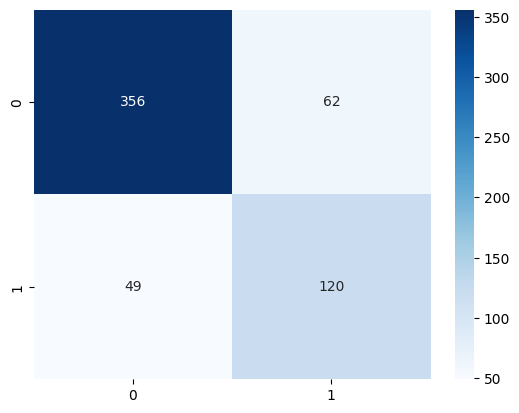

In [14]:
reports = []

BOW_tr = build_bow_tr(tr_txt, V_dict, 0)
BOW_val = build_bow_tr(val_txt, V_dict, 0)

tr_y = list(map(int, tr_y))

parameters = {'C': [.05, .12, .25, .5, 1, 2, 4]}

svr = svm.LinearSVC(class_weight='balanced')
grid = GridSearchCV(estimator=svr, param_grid=parameters, n_jobs=8, scoring='f1_macro', cv=5)

grid.fit(BOW_tr, tr_y)

y_pred = grid.predict(BOW_val)

p, r, f = precision_recall_fscore_support(val_y, y_pred, average='macro', pos_label=1)[:3]

sns.heatmap(confusion_matrix(val_y, y_pred), annot=True, fmt='d', cmap='Blues')
reports.append(metrics.classification_report(val_y, y_pred, output_dict=True))

## Frecuencia

(5278, 5000)
(587, 5000)


/home/juancho/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/juancho/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/juancho/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/juancho/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/juancho/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/juancho/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinea

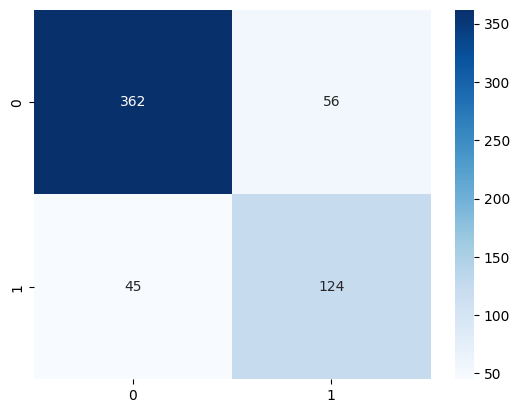

In [47]:
BOW_tr = build_bow_tr(tr_txt, V_dict, 1)
BOW_val = build_bow_tr(val_txt, V_dict, 1)

tr_y = list(map(int, tr_y))

parameters = {'C': [.05, .12, .25, .5, 1, 2, 4]}

svr = svm.LinearSVC(class_weight='balanced')
grid = GridSearchCV(estimator=svr, param_grid=parameters, n_jobs=8, scoring='f1_macro', cv=5)

grid.fit(BOW_tr, tr_y)

y_pred = grid.predict(BOW_val)

p, r, f = precision_recall_fscore_support(val_y, y_pred, average='macro', pos_label=1)[:3]

sns.heatmap(confusion_matrix(val_y, y_pred), annot=True, fmt='d', cmap='Blues')
reports.append(metrics.classification_report(val_y, y_pred, output_dict=True))

## TF-IDF

(5278, 5000)
(587, 5000)


/home/juancho/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/juancho/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/juancho/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/juancho/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/juancho/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/juancho/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinea

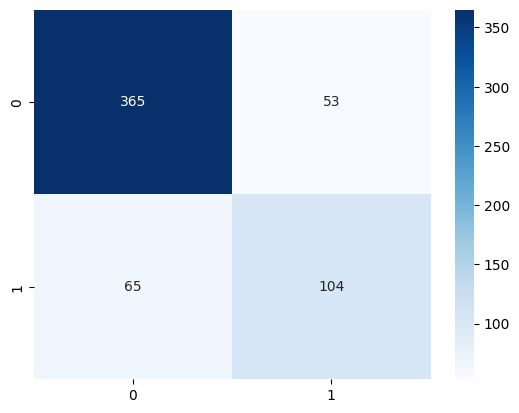

In [48]:
BOW_tr = build_bow_tr(tr_txt, V_dict, 2)
BOW_val = build_bow_tr(val_txt, V_dict, 2)

tr_y = list(map(int, tr_y))

parameters = {'C': [.05, .12, .25, .5, 1, 2, 4]}

svr = svm.LinearSVC(class_weight='balanced')
grid = GridSearchCV(estimator=svr, param_grid=parameters, n_jobs=8, scoring='f1_macro', cv=5)

grid.fit(BOW_tr, tr_y)

y_pred = grid.predict(BOW_val)

p, r, f = precision_recall_fscore_support(val_y, y_pred, average='macro', pos_label=1)[:3]

sns.heatmap(confusion_matrix(val_y, y_pred), annot=True, fmt='d', cmap='Blues')
reports.append(metrics.classification_report(val_y, y_pred, output_dict=True))

## Binario normalizado l2

(5278, 5000)


/tmp/ipykernel_4757/3966505678.py:28: RuntimeWarning: invalid value encountered in divide
  BOW = np.where(l2>0, BOW/l2, 0)


(587, 5000)


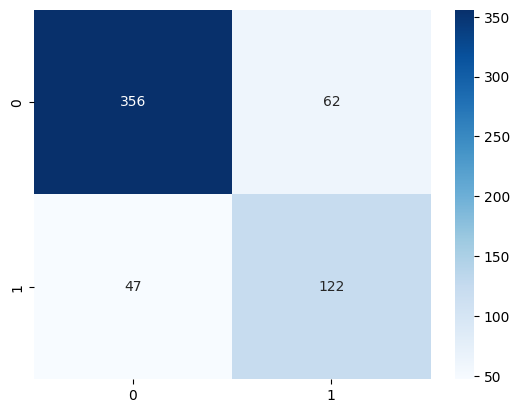

In [49]:
BOW_tr = build_bow_tr(tr_txt, V_dict, 3)
BOW_val = build_bow_tr(val_txt, V_dict, 3)

tr_y = list(map(int, tr_y))

parameters = {'C': [.05, .12, .25, .5, 1, 2, 4]}

svr = svm.LinearSVC(class_weight='balanced')
grid = GridSearchCV(estimator=svr, param_grid=parameters, n_jobs=8, scoring='f1_macro', cv=5)

grid.fit(BOW_tr, tr_y)

y_pred = grid.predict(BOW_val)

p, r, f = precision_recall_fscore_support(val_y, y_pred, average='macro', pos_label=1)[:3]

sns.heatmap(confusion_matrix(val_y, y_pred), annot=True, fmt='d', cmap='Blues')
reports.append(metrics.classification_report(val_y, y_pred, output_dict=True))

## Frecuencia normalizado l2

/tmp/ipykernel_4757/1351571706.py:33: RuntimeWarning: invalid value encountered in divide
  BOW = np.where(l2>0, BOW/l2, 0)


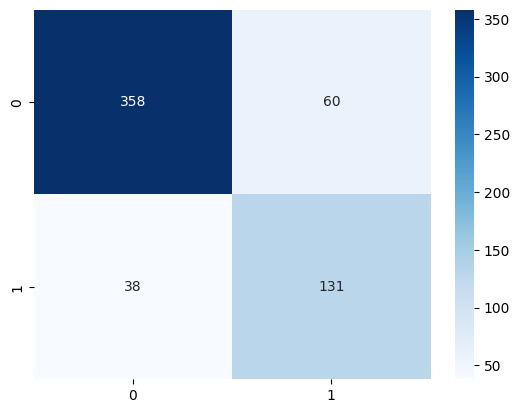

In [17]:
BOW_tr = build_bow_tr(tr_txt, V_dict, 4)
BOW_val = build_bow_tr(val_txt, V_dict, 4)

tr_y = list(map(int, tr_y))

parameters = {'C': [.05, .12, .25, .5, 1, 2, 4]}

svr = svm.LinearSVC(class_weight='balanced')
grid = GridSearchCV(estimator=svr, param_grid=parameters, n_jobs=8, scoring='f1_macro', cv=5)

grid.fit(BOW_tr, tr_y)

y_pred = grid.predict(BOW_val)

p, r, f = precision_recall_fscore_support(val_y, y_pred, average='macro', pos_label=1)[:3]

sns.heatmap(confusion_matrix(val_y, y_pred), annot=True, fmt='d', cmap='Blues')
reports.append(metrics.classification_report(val_y, y_pred, output_dict=True))

## TF-IDF normalizado l2

/tmp/ipykernel_4757/1351571706.py:33: RuntimeWarning: invalid value encountered in divide
  BOW = np.where(l2>0, BOW/l2, 0)


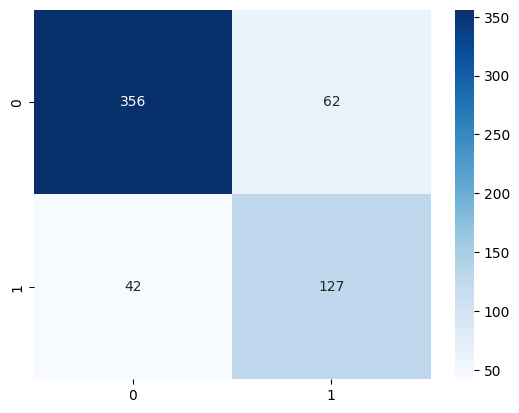

In [18]:
BOW_tr = build_bow_tr(tr_txt, V_dict, 5)
BOW_val = build_bow_tr(val_txt, V_dict, 5)

tr_y = list(map(int, tr_y))

parameters = {'C': [.05, .12, .25, .5, 1, 2, 4]}

svr = svm.LinearSVC(class_weight='balanced')
grid = GridSearchCV(estimator=svr, param_grid=parameters, n_jobs=8, scoring='f1_macro', cv=5)

grid.fit(BOW_tr, tr_y)

y_pred = grid.predict(BOW_val)

p, r, f = precision_recall_fscore_support(val_y, y_pred, average='macro', pos_label=1)[:3]

sns.heatmap(confusion_matrix(val_y, y_pred), annot=True, fmt='d', cmap='Blues')
reports.append(metrics.classification_report(val_y, y_pred, output_dict=True))

## Comparacion

Al observar la puntuacion F1 de los seis ponderajes, se observa que la frecuencia normalizada obtiene el mayor valor, aunque solo por una centesima respecto a los obtenidos por la frecuencia regular y el TF-IDF normalizado.

In [19]:
import pandas as pd
results = pd.DataFrame({
    "weighing scheme": ["binario", "frecuencia", "tf-idf", "binario normalizado", "frecuencia normalizado", "tf-idf normalizado"],
    "f1": [report["macro avg"]["f1-score"] for report in reports],
    "accuracy": [report["accuracy"] for report in reports],
    "precision": [report["macro avg"]["precision"] for report in reports],
})
results

,weighing scheme,f1,accuracy,precision
0,binario,0.774444,0.810903,0.769177
1,frecuencia,0.794089,0.827939,0.789162
2,tf-idf,0.749443,0.798978,0.755629
3,binario normalizado,0.779227,0.814310,0.773209
4,frecuencia normalizado,0.803692,0.833049,0.794952
5,tf-idf normalizado,0.791023,0.822828,0.783215


## Vocabularios de diferente tamano
### 1000 terminos

(5278, 1000)


/tmp/ipykernel_4757/3966505678.py:28: RuntimeWarning: invalid value encountered in divide
  BOW = np.where(l2>0, BOW/l2, 0)


(587, 1000)


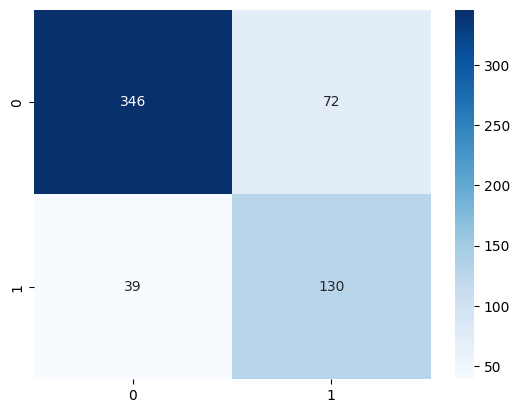

In [50]:
V = V_whole[:1000]

V_dict = dict([(word, i) for i, (freq, word) in enumerate(V)])

BOW_tr = build_bow_tr(tr_txt, V_dict, 4)
BOW_val = build_bow_tr(val_txt, V_dict, 4)

tr_y = list(map(int, tr_y))

parameters = {'C': [.05, .12, .25, .5, 1, 2, 4]}

svr = svm.LinearSVC(class_weight='balanced')
grid = GridSearchCV(estimator=svr, param_grid=parameters, n_jobs=8, scoring='f1_macro', cv=5)

grid.fit(BOW_tr, tr_y)

y_pred = grid.predict(BOW_val)

p, r, f = precision_recall_fscore_support(val_y, y_pred, average='macro', pos_label=1)[:3]

sns.heatmap(confusion_matrix(val_y, y_pred), annot=True, fmt='d', cmap='Blues')
report1000 = metrics.classification_report(val_y, y_pred, output_dict=True)

### 7000 terminos

(5278, 7000)
(587, 7000)


/tmp/ipykernel_4757/3966505678.py:28: RuntimeWarning: invalid value encountered in divide
  BOW = np.where(l2>0, BOW/l2, 0)


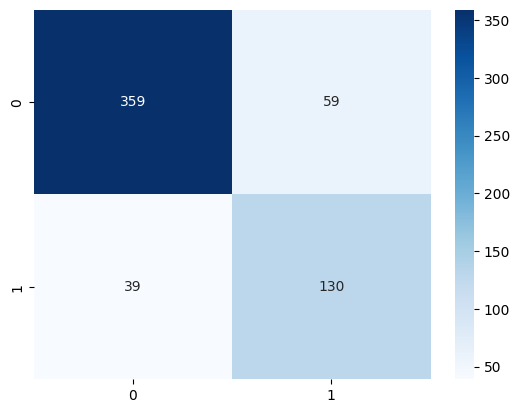

In [51]:
V = V_whole[:7000]

V_dict = dict([(word, i) for i, (freq, word) in enumerate(V)])

BOW_tr = build_bow_tr(tr_txt, V_dict, 4)
BOW_val = build_bow_tr(val_txt, V_dict, 4)

tr_y = list(map(int, tr_y))

parameters = {'C': [.05, .12, .25, .5, 1, 2, 4]}

svr = svm.LinearSVC(class_weight='balanced')
grid = GridSearchCV(estimator=svr, param_grid=parameters, n_jobs=8, scoring='f1_macro', cv=5)

grid.fit(BOW_tr, tr_y)

y_pred = grid.predict(BOW_val)

p, r, f = precision_recall_fscore_support(val_y, y_pred, average='macro', pos_label=1)[:3]

sns.heatmap(confusion_matrix(val_y, y_pred), annot=True, fmt='d', cmap='Blues')
report7000 = metrics.classification_report(val_y, y_pred, output_dict=True)

Al comparar los resultados obtenidos con los vocabularios de 1000, 5000 y 7000 palabras se observa que el primero es el que tiene el menor puntaje F1, mientras que los otros dos no muestran una diferencia significativa entre si, apuntando a que mas alla de las 5000 palabras de vocabulario, los terminos son tan poco frecuentes que no aportan ninguna informacion significativa

In [170]:
varying_vocab = pd.DataFrame({
    "Vocabulary size": [1000, 5000, 7000],
    "f1": [report1000["macro avg"]["f1-score"], results["f1"][4], report7000["macro avg"]["f1-score"]],
    "accuracy": [report1000["accuracy"], results["accuracy"][4], report7000["accuracy"]],
    "precision": [report1000["macro avg"]["precision"], results["precision"][4], report7000["macro avg"]["precision"]],
})
varying_vocab

,Vocabulary size,f1,accuracy,precision
0,1000,0.781288,0.810903,0.771133
1,5000,0.803692,0.833049,0.794952
2,7000,0.803079,0.833049,0.794920


## EmoLex

In [53]:
emolex = pd.read_csv("./NRC-Emotion-Lexicon/OneFilePerLanguage/Spanish-NRC-EmoLex.txt", sep="\t")
emolex.drop("English Word", axis=1, inplace=True)
emolex["Spanish Word"] = emolex["Spanish Word"].str.lower()
emolex = emolex.groupby("Spanish Word").max().reset_index()
emolex

,Spanish Word,anger,anticipation,disgust,fear,joy,negative,positive,sadness,surprise,trust
0,a bordo,0,0,0,0,0,0,0,0,0,0
1,a ciegas,0,0,0,0,0,1,0,1,0,0
2,a cuadros,0,0,0,0,0,0,0,0,0,0
3,a distancia,0,0,0,0,0,1,0,0,0,0
4,a granel,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
11245,úlcera,1,0,1,1,0,1,0,1,0,0
11246,último,0,1,0,0,0,0,0,1,0,0
11247,único,0,0,0,0,0,0,1,0,1,0
11248,útil,0,0,0,0,1,0,1,0,0,1


Se toma solo la interseccion entre el vocabulario del corpus de entrenamiento y las contenidas en EmoLex.

In [58]:
V = V_whole[:6000]
V_dict = dict([(word.lower(), i) for i, (freq, word) in enumerate(V)])

V_emociones = pd.merge(pd.DataFrame(V_dict.keys(), columns=["Spanish Word"]), emolex, on="Spanish Word", how="inner")
V_emociones.set_index("Spanish Word", inplace=True)
V_emociones

,anger,anticipation,disgust,fear,joy,negative,positive,sadness,surprise,trust
Spanish Word,,,,,,,,,,
no,0,1,0,0,0,1,0,0,0,0
con,0,1,0,0,1,0,1,0,1,0
madre,0,1,0,0,1,1,1,1,0,1
loca,1,0,0,1,0,1,0,1,0,0
cuando,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
talento,0,0,0,0,0,0,1,0,0,0
tacón,0,0,0,0,0,1,0,0,0,0
tabaco,0,0,0,0,0,1,0,0,0,0


In [138]:
# Construccion de la matriz de BOE, donde cada fila es un documento y cada columna una emocion de las presentes en EmoLex
def build_boe_emolex(tr_txt, V_emociones, weighing_scheme):
    '''
        tr_txt: lista de documentos (strings), 
        V: diccionario de palabras ( word, (indice, freq) ),
        weighing_scheme: 0 (binario), 1 (frecuencia), 2 (tf-idf), 3 (binario normalizado), 4 (frecuencia normalizado), 5 (tf-idf normalizado)
    '''

    num_docs = len(tr_txt)
    BOE = np.zeros((num_docs, len(V_emociones.columns)),dtype=int)
    
    for doc_idx, tr in enumerate(tr_txt):
        fdist_doc = nltk.FreqDist(tokenizer.tokenize(tr))
        for word in fdist_doc:
            if word in V_emociones.index: # en caso de que la palabra no este en el diccionario recortado
                if weighing_scheme in [0,3]: # binario
                    BOE[doc_idx] |= V_emociones.loc[word].to_numpy()
                else: # frecuencia
                    BOE[doc_idx] += fdist_doc[word]*V_emociones.loc[word].to_numpy()
            if weighing_scheme in [2,5]: # tf-idf regular o normalizado
                BOE[doc_idx] = np.where(BOE[doc_idx]>0, 1 + np.log10(BOE[doc_idx] + 1e-9), 0)
    if weighing_scheme in [2,5]: # producto idf
        BOE = BOE * np.log10(num_docs/(1+np.count_nonzero(BOE, axis=0)))
    if weighing_scheme > 2:
        l2 = np.linalg.norm(BOE, axis=1, keepdims=True)
        BOE = np.where(l2>0, BOE/l2, 0)
    return BOE

/tmp/ipykernel_4757/2984272297.py:26: RuntimeWarning: invalid value encountered in divide
  BOE = np.where(l2>0, BOE/l2, 0)


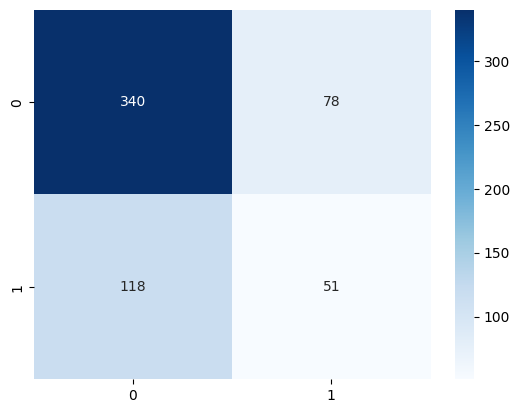

In [139]:
report_emolex = []

BOE_tr = build_boe_emolex(tr_txt, V_emociones, 3)
BOE_val = build_boe_emolex(val_txt, V_emociones, 3)

tr_y = list(map(int, tr_y))

parameters = {'C': [.05, .12, .25, .5, 1, 2, 4]}

svr = svm.LinearSVC(class_weight='balanced')
grid = GridSearchCV(estimator=svr, param_grid=parameters, n_jobs=8, scoring='f1_macro', cv=5)

grid.fit(BOE_tr, tr_y)

y_pred = grid.predict(BOE_val)

p, r, f = precision_recall_fscore_support(val_y, y_pred, average='macro', pos_label=1)[:3]

sns.heatmap(confusion_matrix(val_y, y_pred), annot=True, fmt='d', cmap='Blues')
report_emolex.append(metrics.classification_report(val_y, y_pred, output_dict=True))

/tmp/ipykernel_4757/2984272297.py:26: RuntimeWarning: invalid value encountered in divide
  BOE = np.where(l2>0, BOE/l2, 0)


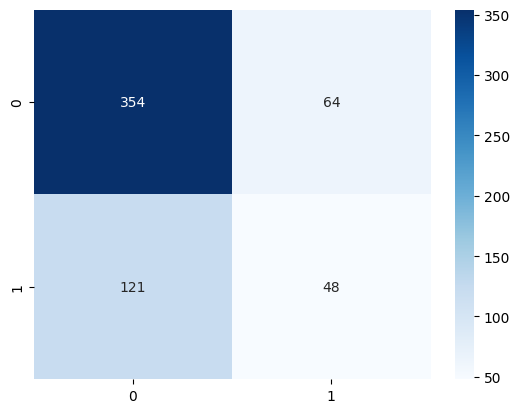

In [140]:
BOE_tr = build_boe_emolex(tr_txt, V_emociones, 4)
BOE_val = build_boe_emolex(val_txt, V_emociones, 4)

tr_y = list(map(int, tr_y))

parameters = {'C': [.05, .12, .25, .5, 1, 2, 4]}

svr = svm.LinearSVC(class_weight='balanced')
grid = GridSearchCV(estimator=svr, param_grid=parameters, n_jobs=8, scoring='f1_macro', cv=5)

grid.fit(BOE_tr, tr_y)

y_pred = grid.predict(BOE_val)

p, r, f = precision_recall_fscore_support(val_y, y_pred, average='macro', pos_label=1)[:3]

sns.heatmap(confusion_matrix(val_y, y_pred), annot=True, fmt='d', cmap='Blues')
report_emolex.append(metrics.classification_report(val_y, y_pred, output_dict=True))

/tmp/ipykernel_4757/2984272297.py:26: RuntimeWarning: invalid value encountered in divide
  BOE = np.where(l2>0, BOE/l2, 0)


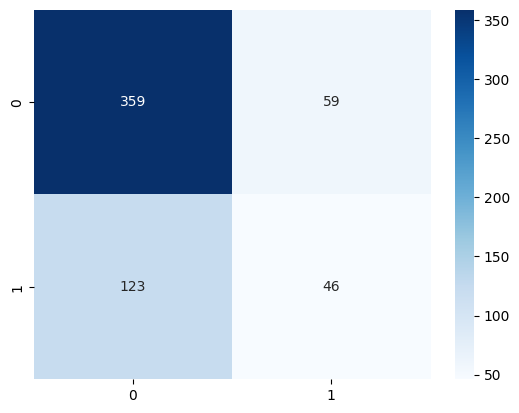

In [141]:
BOE_tr = build_boe_emolex(tr_txt, V_emociones, 5)
BOE_val = build_boe_emolex(val_txt, V_emociones, 5)

tr_y = list(map(int, tr_y))

parameters = {'C': [.05, .12, .25, .5, 1, 2, 4]}

svr = svm.LinearSVC(class_weight='balanced')
grid = GridSearchCV(estimator=svr, param_grid=parameters, n_jobs=8, scoring='f1_macro', cv=5)

grid.fit(BOE_tr, tr_y)

y_pred = grid.predict(BOE_val)

p, r, f = precision_recall_fscore_support(val_y, y_pred, average='macro', pos_label=1)[:3]

sns.heatmap(confusion_matrix(val_y, y_pred), annot=True, fmt='d', cmap='Blues')
report_emolex.append(metrics.classification_report(val_y, y_pred, output_dict=True))

In [142]:
results = pd.DataFrame({
    "weighing scheme": ["binario normalizado", "frecuencia normalizado", "tf-idf normalizado"],
    "f1": [report["macro avg"]["f1-score"] for report in report_emolex],
    "accuracy": [report["accuracy"] for report in report_emolex],
    "precision": [report["macro avg"]["precision"] for report in report_emolex],
})
results

,weighing scheme,f1,accuracy,precision
0,binario normalizado,0.559269,0.666099,0.568853
1,frecuencia normalizado,0.567235,0.684838,0.586917
2,tf-idf normalizado,0.566772,0.689949,0.591454


# Recurso Línguistico de Emociones Mexicano

In [313]:
sel_data = pd.read_csv("./SEL/SEL.txt", sep="\t", encoding="ISO-8859-1")
sel_data

,Palabra,PFA,Categoría
0,abundancia,0.830,Alegría
1,acabalar,0.396,Alegría
2,acallar,0.198,Alegría
3,acatar,0.198,Alegría
4,acción,0.397,Alegría
...,...,...,...
2031,trizas,0.464,Tristeza
2032,vejación,0.297,Tristeza
2033,vejar,0.396,Tristeza
2034,vergonzoso,0.231,Tristeza


In [434]:
sel = sel_data.pivot_table(index="Palabra", columns="Categoría", values=" PFA", fill_value=0)
# Reset index if needed
sel = sel.reset_index()
sel["PFA"] = sel_data.groupby("Palabra")[" PFA"].first().values
sel.iloc[:, 1:-1] = (sel.iloc[:, 1:-1] > 0).astype(int)
sel = sel.astype({'Alegría': 'int', 'Enojo': 'int', 'Miedo': 'int', 'Repulsión': 'int', 'Sorpresa': 'int', 'Tristeza': 'int'})
sel["Palabra"] = sel["Palabra"].str.strip()
#sel.set_index("Palabra", inplace=True)
print(sel)

Categoría         Palabra  Alegría  Enojo  Miedo  Repulsión  Sorpresa  \
0             abajamiento        0      0      0          0         0   
1                   abajo        0      0      0          0         0   
2          abandonamiento        0      0      0          0         0   
3               abandonar        0      0      0          0         0   
4            abatidamente        0      0      0          0         0   
...                   ...      ...    ...    ...        ...       ...   
1904                ánimo        1      1      0          0         0   
1905                ávido        1      0      0          0         0   
1906                éxito        1      0      0          0         0   
1907               ímpetu        1      0      0          0         0   
1908                 útil        1      0      0          0         0   

Categoría  Tristeza    PFA  
0                 1  0.497  
1                 1  0.364  
2                 1  0.865  
3      

Se toma solo la interseccion entre el vocabulario del corpus de entrenamiento y las contenidas en SEL.

In [435]:
V_emociones = pd.merge(pd.DataFrame(V_dict.keys(), columns=["Palabra"]), sel, on="Palabra", how="inner")
V_emociones = V_emociones.groupby("Palabra").max()
V_emociones

,Alegría,Enojo,Miedo,Repulsión,Sorpresa,Tristeza,PFA
Palabra,,,,,,,
abajo,0,0,0,0,0,1,0.364
abierto,0,0,0,0,1,0,0.298
accidente,0,0,1,0,0,0,0.696
admirar,1,0,0,0,1,0,0.731
agarrar,0,1,0,0,0,0,0.231
...,...,...,...,...,...,...,...
victoria,1,0,0,0,0,0,0.763
vil,0,0,0,1,0,0,0.696
violencia,0,1,0,0,0,0,0.932


Para incorporar el PFA, agregarlo como una columna extra en la BoE, si bien redondeandolo al entero mas cercano para mantener la informacion como enteros.

La razon para hacerlo asi es que, al reflejar la "intensidad" con la que dicha emocion esta asociada a la palabra, el PFA aporta informacion importante sobre la asociacion que se hace entre terminos y emociones.

In [436]:
# Construccion de la matriz de BOE, donde cada fila es un documento y cada columna una emocion de las presentes en SEL
def build_boe_sel(tr_txt, vocab_emotions, weighing_scheme, use_pfa=False):
    num_docs = len(tr_txt)

    if not use_pfa:
        end = len(vocab_emotions.columns)-1
    else:
        end = len(vocab_emotions.columns)
    
    BOE = np.zeros((num_docs, len(vocab_emotions.columns[:end])), dtype=int)

    
    for doc_idx, tr in enumerate(tr_txt):
        fdist_doc = nltk.FreqDist(tokenizer.tokenize(tr))
        for word in fdist_doc:
            if word in vocab_emotions.index:
                if weighing_scheme in [0, 3]:  # Binario
                    BOE[doc_idx] |= np.round(vocab_emotions.loc[word].to_numpy()[:end]).astype(int)
                else: # frecuencia
                    BOE[doc_idx] += fdist_doc[word]*np.round(vocab_emotions.loc[word].to_numpy()[:end]).astype(int)
            if weighing_scheme in [2,5]: # tf-idf regular o normalizado
                BOE[doc_idx] = np.where(BOE[doc_idx]>0, 1 + np.log10(BOE[doc_idx] + 1e-9), 0)

    if weighing_scheme in [2, 5]:  # Product IDF
        BOE = BOE * np.log10(num_docs / (1 + np.count_nonzero(BOE, axis=0)))

    if weighing_scheme > 2:
        l2 = np.linalg.norm(BOE, axis=1, keepdims=True)
        BOE = np.where(l2 > 0, BOE / l2, 0)
    return BOE


## Sin PFA

/home/juancho/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/juancho/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


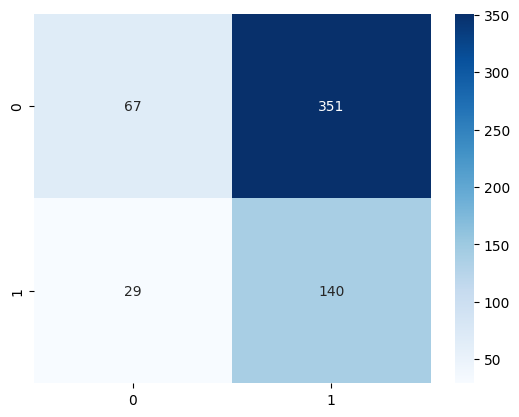

In [437]:
report_sel = []

BOE_tr = build_boe_sel(tr_txt, V_emociones, 0)
BOE_val = build_boe_sel(val_txt, V_emociones, 0)

tr_y = list(map(int, tr_y))

parameters = {'C': [.05, .12, .25, .5, 1, 2, 4]}

svr = svm.LinearSVC(class_weight='balanced')
grid = GridSearchCV(estimator=svr, param_grid=parameters, n_jobs=8, scoring='f1_macro', cv=5)

grid.fit(BOE_tr, tr_y)

y_pred = grid.predict(BOE_val)

p, r, f = precision_recall_fscore_support(val_y, y_pred, average='macro', pos_label=1)[:3]

sns.heatmap(confusion_matrix(val_y, y_pred), annot=True, fmt='d', cmap='Blues')
report_sel.append(metrics.classification_report(val_y, y_pred, output_dict=True))

/home/juancho/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/juancho/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/juancho/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/juancho/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/juancho/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/juancho/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinea

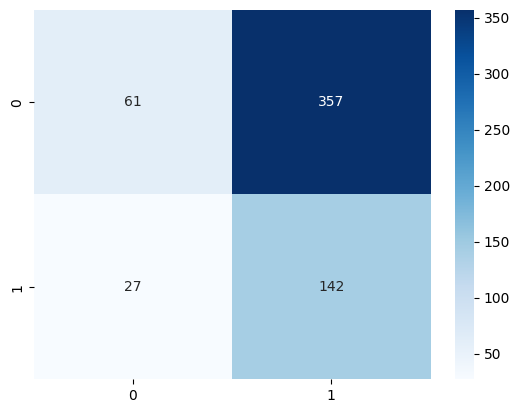

In [438]:
BOE_tr = build_boe_sel(tr_txt, V_emociones, 1)
BOE_val = build_boe_sel(val_txt, V_emociones, 1)

tr_y = list(map(int, tr_y))

parameters = {'C': [.05, .12, .25, .5, 1, 2, 4]}

svr = svm.LinearSVC(class_weight='balanced')
grid = GridSearchCV(estimator=svr, param_grid=parameters, n_jobs=8, scoring='f1_macro', cv=5)

grid.fit(BOE_tr, tr_y)

y_pred = grid.predict(BOE_val)

p, r, f = precision_recall_fscore_support(val_y, y_pred, average='macro', pos_label=1)[:3]

sns.heatmap(confusion_matrix(val_y, y_pred), annot=True, fmt='d', cmap='Blues')
report_sel.append(metrics.classification_report(val_y, y_pred, output_dict=True))

/home/juancho/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/juancho/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/juancho/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/juancho/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/juancho/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


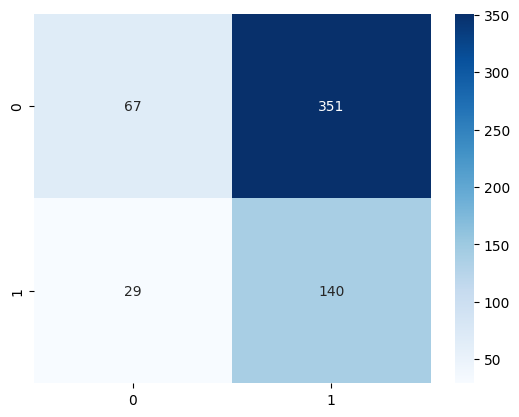

In [439]:
BOE_tr = build_boe_sel(tr_txt, V_emociones, 2)
BOE_val = build_boe_sel(val_txt, V_emociones, 2)

tr_y = list(map(int, tr_y))

parameters = {'C': [.05, .12, .25, .5, 1, 2, 4]}

svr = svm.LinearSVC(class_weight='balanced')
grid = GridSearchCV(estimator=svr, param_grid=parameters, n_jobs=8, scoring='f1_macro', cv=5)

grid.fit(BOE_tr, tr_y)

y_pred = grid.predict(BOE_val)

p, r, f = precision_recall_fscore_support(val_y, y_pred, average='macro', pos_label=1)[:3]

sns.heatmap(confusion_matrix(val_y, y_pred), annot=True, fmt='d', cmap='Blues')
report_sel.append(metrics.classification_report(val_y, y_pred, output_dict=True))

In [440]:
results = pd.DataFrame({
    "weighing scheme": ["binario", "frecuencia", "tf-idf"],
    "f1": [report["macro avg"]["f1-score"] for report in report_sel],
    "accuracy": [report["accuracy"] for report in report_sel],
    "precision": [report["macro avg"]["precision"] for report in report_sel],
})
results

,weighing scheme,f1,accuracy,precision
0,binario,0.342471,0.352641,0.491525
1,frecuencia,0.333128,0.345826,0.488875
2,tf-idf,0.342471,0.352641,0.491525


## Con PFA

/home/juancho/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/juancho/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/juancho/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


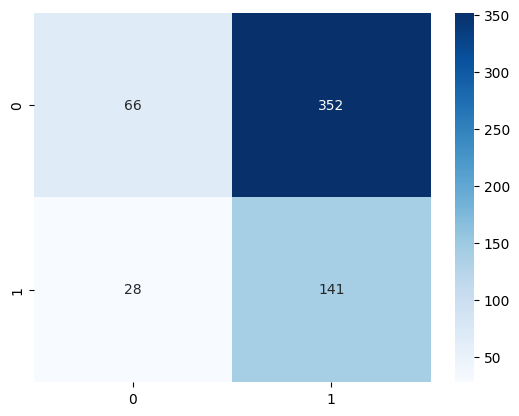

In [418]:
report_sel = []

BOE_tr = build_boe_sel(tr_txt, V_emociones, 0, True)
BOE_val = build_boe_sel(val_txt, V_emociones, 0, True)

tr_y = list(map(int, tr_y))

parameters = {'C': [.05, .12, .25, .5, 1, 2, 4]}

svr = svm.LinearSVC(class_weight='balanced')
grid = GridSearchCV(estimator=svr, param_grid=parameters, n_jobs=8, scoring='f1_macro', cv=5)

grid.fit(BOE_tr, tr_y)

y_pred = grid.predict(BOE_val)

p, r, f = precision_recall_fscore_support(val_y, y_pred, average='macro', pos_label=1)[:3]

sns.heatmap(confusion_matrix(val_y, y_pred), annot=True, fmt='d', cmap='Blues')
report_sel.append(metrics.classification_report(val_y, y_pred, output_dict=True))

/home/juancho/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/juancho/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/juancho/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/juancho/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/juancho/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/juancho/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinea

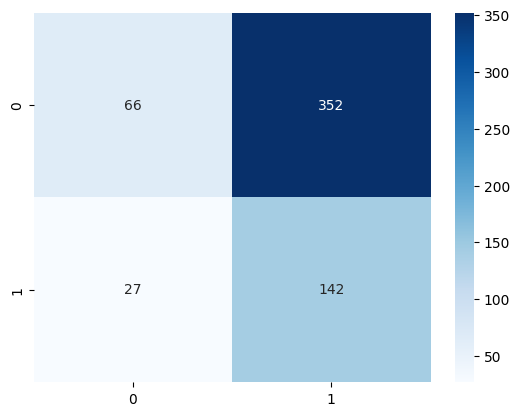

In [419]:
BOE_tr = build_boe_sel(tr_txt, V_emociones, 1, True)
BOE_val = build_boe_sel(val_txt, V_emociones, 1, True)

tr_y = list(map(int, tr_y))

parameters = {'C': [.05, .12, .25, .5, 1, 2, 4]}

svr = svm.LinearSVC(class_weight='balanced')
grid = GridSearchCV(estimator=svr, param_grid=parameters, n_jobs=8, scoring='f1_macro', cv=5)

grid.fit(BOE_tr, tr_y)

y_pred = grid.predict(BOE_val)

p, r, f = precision_recall_fscore_support(val_y, y_pred, average='macro', pos_label=1)[:3]

sns.heatmap(confusion_matrix(val_y, y_pred), annot=True, fmt='d', cmap='Blues')
report_sel.append(metrics.classification_report(val_y, y_pred, output_dict=True))

/home/juancho/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/juancho/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/juancho/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/juancho/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/juancho/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


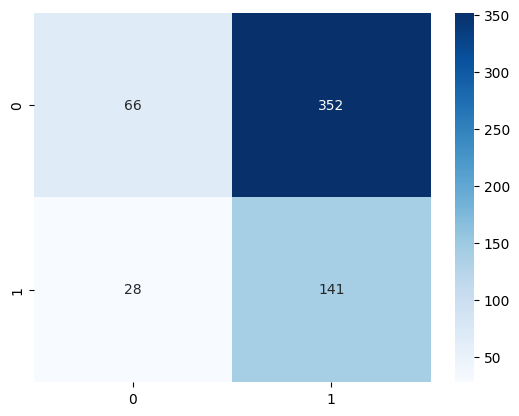

In [420]:
BOE_tr = build_boe_sel(tr_txt, V_emociones, 2, True)
BOE_val = build_boe_sel(val_txt, V_emociones, 2, True)

tr_y = list(map(int, tr_y))

parameters = {'C': [.05, .12, .25, .5, 1, 2, 4]}

svr = svm.LinearSVC(class_weight='balanced')
grid = GridSearchCV(estimator=svr, param_grid=parameters, n_jobs=8, scoring='f1_macro', cv=5)

grid.fit(BOE_tr, tr_y)

y_pred = grid.predict(BOE_val)

p, r, f = precision_recall_fscore_support(val_y, y_pred, average='macro', pos_label=1)[:3]

sns.heatmap(confusion_matrix(val_y, y_pred), annot=True, fmt='d', cmap='Blues')
report_sel.append(metrics.classification_report(val_y, y_pred, output_dict=True))

In [421]:
results = pd.DataFrame({
    "weighing scheme": ["binario", "frecuencia", "tf-idf"],
    "f1": [report["macro avg"]["f1-score"] for report in report_sel],
    "accuracy": [report["accuracy"] for report in report_sel],
    "precision": [report["macro avg"]["precision"] for report in report_sel],
})
results

,weighing scheme,f1,accuracy,precision
0,binario,0.341897,0.352641,0.494066
1,frecuencia,0.343336,0.354344,0.498563
2,tf-idf,0.341897,0.352641,0.494066


La razon de que se obtengan valores tan similares puede ser debido al tamano del vocabulario con el que se construyen las BoEs: al ser de tan pocas palabras, la matriz es aun mas sparse, de manera que no contiene informacion suficiente para obtener buenos resultados

# ¿Podemos mejorar con Bigramas?

In [442]:
import nltk
from nltk.collocations import BigramCollocationFinder
from nltk.probability import FreqDist
from collections import Counter

In [471]:
finder = BigramCollocationFinder.from_words(corpus_palabras)
bigram_freq = finder.ngram_fd

most_common_bigrams = bigram_freq.most_common(1000)
most_common_bigrams = dict([(bigram, i) for i, (bigram, freq) in enumerate(most_common_bigrams)])
most_common_bigrams

{('!', '!'): 0,
 ('@USUARIO', '@USUARIO'): 1,
 ('a', 'la'): 2,
 ('de', 'la'): 3,
 ('la', 'verga'): 4,
 ('que', 'no'): 5,
 ('😂', '😂'): 6,
 ('que', 'me'): 7,
 (',', 'no'): 8,
 ('.', '@USUARIO'): 9,
 ('en', 'la'): 10,
 ('que', 'se'): 11,
 ('en', 'el'): 12,
 (',', 'pero'): 13,
 ('la', 'madre'): 14,
 ('lo', 'que'): 15,
 ('y', 'no'): 16,
 ('los', 'putos'): 17,
 ('no', 'se'): 18,
 ('que', 'te'): 19,
 ('.', 'No'): 20,
 ('no', 'me'): 21,
 ('?', '?'): 22,
 (',', 'que'): 23,
 ('puta', 'madre'): 24,
 ('su', 'madre'): 25,
 ('a', 'su'): 26,
 ('para', 'que'): 27,
 ('voy', 'a'): 28,
 ('las', 'putas'): 29,
 (',', 'ya'): 30,
 ('de', 'mi'): 31,
 ('a', 'las'): 32,
 ('madre', '.'): 33,
 ('es', 'que'): 34,
 ('a', 'los'): 35,
 ('de', 'los'): 36,
 ('verga', ','): 37,
 ('y', 'me'): 38,
 ('a', 'mi'): 39,
 ('que', 'la'): 40,
 (',', 'me'): 41,
 ('.', 'Me'): 42,
 ('verga', '.'): 43,
 ('madre', ','): 44,
 ('no', 'es'): 45,
 ('vale', 'verga'): 46,
 (',', 'y'): 47,
 ('no', 'te'): 48,
 ('con', 'el'): 49,
 ('de', 'su')

In [472]:
def extract_bigrams(text):
    bigrams = list(nltk.bigrams(tokenizer.tokenize(text)))
    return bigrams

def bigram_bow(tr_txt, V_bigrams, weighing_scheme):
    BOW = np.zeros((len(tr_txt), len(V_bigrams)),dtype=int)
    for doc_idx, tr in enumerate(tr_txt):
        bigrams = extract_bigrams(tr)
        for bigram in bigrams:
            if bigram in V_bigrams:
                if weighing_scheme in [0,3]: # binario
                    BOW[doc_idx, V_bigrams[bigram]] = 1
                else: # frecuencia
                    BOW[doc_idx, V_bigrams[bigram]] += 1
        if weighing_scheme in [2,5]: # tf-idf regular o normalizado
            BOW[doc_idx] = np.where(BOW[doc_idx]>0, 1 + np.log10(BOW[doc_idx] + 1e-9), 0)
    if weighing_scheme in [2,5]: # producto idf
        BOW = BOW * np.log10(len(tr_txt)/(1+np.count_nonzero(BOW, axis=0)))
    if weighing_scheme > 2:
        l2 = np.linalg.norm(BOW, axis=1, keepdims=True)
        BOW = np.where(l2>0, BOW/l2, 0)
    return BOW

Se concatenara la BoW con frecuencia normalizada a la BoW de bigramas

In [497]:
V = V_whole[:5000]
V_dict = dict([(word, i) for i, (freq, word) in enumerate(V)])
weigh_scheme = 4

BOW_tr = build_bow_tr(tr_txt, V_dict, weigh_scheme)
BOW_bigrams_tr = bigram_bow(tr_txt, most_common_bigrams, weigh_scheme)
BOW_tr = np.hstack((BOW_tr, BOW_bigrams_tr))

BOW_val = build_bow_tr(val_txt, V_dict, weigh_scheme)
BOW_bigrams_val = bigram_bow(val_txt, most_common_bigrams, weigh_scheme)
BOW_val = np.hstack((BOW_val, BOW_bigrams_val))

/tmp/ipykernel_4757/950209532.py:28: RuntimeWarning: invalid value encountered in divide
  BOW = np.where(l2>0, BOW/l2, 0)
/tmp/ipykernel_4757/2585383405.py:21: RuntimeWarning: invalid value encountered in divide
  BOW = np.where(l2>0, BOW/l2, 0)


Al analizar el puntaje F1, se observa una reduccion de alrededor de 0.02 respecto al caso en el que se empleo la BoW sin bigramas, y de entre 0.01 y 0.02 en el resto de las metricas.

              precision    recall  f1-score   support

           0       0.89      0.85      0.87       418
           1       0.67      0.73      0.70       169

    accuracy                           0.82       587
   macro avg       0.78      0.79      0.78       587
weighted avg       0.82      0.82      0.82       587



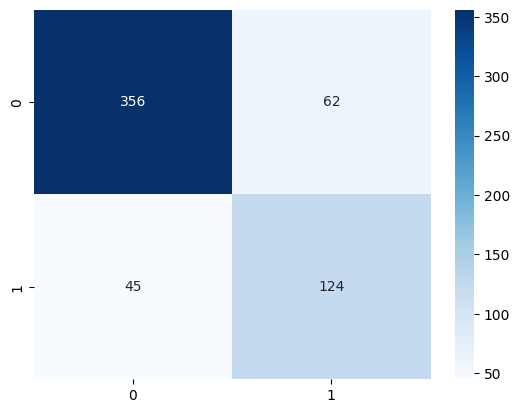

In [491]:
tr_y = list(map(int, tr_y))

parameters = {'C': [.05, .12, .25, .5, 1, 2, 4]}

svr = svm.LinearSVC(class_weight='balanced')
grid = GridSearchCV(estimator=svr, param_grid=parameters, n_jobs=8, scoring='f1_macro', cv=5)

grid.fit(BOW_tr, tr_y)

y_pred = grid.predict(BOW_val)

p, r, f = precision_recall_fscore_support(val_y, y_pred, average='macro', pos_label=1)[:3]

sns.heatmap(confusion_matrix(val_y, y_pred), annot=True, fmt='d', cmap='Blues')
print(metrics.classification_report(val_y, y_pred))

Se construye la bolsa concatenada de BoW regular, BoW de bigramas, y BoE con los datos de EmoLex; se decide ignorar la BoE de SEL debido a sus resultados tan bajos y lo limitado de su vocabulario.

In [498]:
V_emociones = pd.merge(pd.DataFrame(V_dict.keys(), columns=["Spanish Word"]), emolex, on="Spanish Word", how="inner")
V_emociones.set_index("Spanish Word", inplace=True)

BOE_tr = build_boe_emolex(tr_txt, V_emociones, weigh_scheme)
BOW_tr = np.hstack((BOW_tr, BOE_tr))
BOE_val = build_boe_emolex(val_txt, V_emociones, weigh_scheme)
BOW_val = np.hstack((BOW_val, BOE_val))

/tmp/ipykernel_4757/3070527438.py:53: RuntimeWarning: invalid value encountered in divide
  BOE = np.where(l2>0, BOE/l2, 0)


Por su parte, al integrar la BoE, se observa tan solo una caida de 0.01 respecto de la BoW regular, con el resto de metricas manteniendose practicamente iguales

              precision    recall  f1-score   support

           0       0.89      0.86      0.88       418
           1       0.68      0.74      0.71       169

    accuracy                           0.83       587
   macro avg       0.79      0.80      0.79       587
weighted avg       0.83      0.83      0.83       587



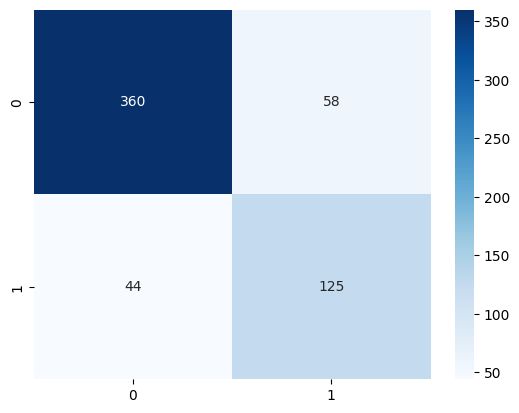

In [499]:
tr_y = list(map(int, tr_y))

parameters = {'C': [.05, .12, .25, .5, 1, 2, 4]}

svr = svm.LinearSVC(class_weight='balanced')
grid = GridSearchCV(estimator=svr, param_grid=parameters, n_jobs=8, scoring='f1_macro', cv=5)

grid.fit(BOW_tr, tr_y)

y_pred = grid.predict(BOW_val)

p, r, f = precision_recall_fscore_support(val_y, y_pred, average='macro', pos_label=1)[:3]

sns.heatmap(confusion_matrix(val_y, y_pred), annot=True, fmt='d', cmap='Blues')
print(metrics.classification_report(val_y, y_pred))

# Conclusiones

Las BoW solo con palabras e integrando los bigramas fueron las que obtuvieron unos de los mejores resultados de entre las pruebas realizadas, si bien observandose una caida respecto a la BoW de terminos unicamente; lo mismo sucedio con la BoW regular + BoW de bigramas + BoE EmoLex, que obtuvo los segundos mejores puntajes de entre todas las pruebas. Sin embargo, aunque la integracion de las tres bolsas si dio resultados muy buenos, no parece ser que el mayor costo computacional y de memoria justifique su uso por sobre de la BoW de terminos comun y corriente, la cual se mantuvo como la mejor puntuada a lo largo de todos los esquemas de ponderaje, pudiendo incluso tomar los mas simples (como el binario y el de frecuencias) sin observar disminuciones significativas en su rendimiento.

Posibles maneras de mejorarlo incluirian el aumentar la cantidad de terminos a los que se tienen asociadas emociones, de manera que pueda capturarse con mayor precision el sentimiento que aportan las palabras mas frecuentes a cada documento; de la misma forma, seria posible hacer un mejor uso de la metrica PFA, probando otras maneras en las que se integre a la BoE y que reporten mejores resultados.